In [1]:
#Import necessary things

# Python 2 & 3 Compatibility
from __future__ import division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.dates as dte
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import datetime

%matplotlib inline

In [2]:
#Import the movies data from '2013_movies.csv'
chall3movies = pd.read_csv('../challenges/02-pandas/2013_movies.csv', parse_dates=['ReleaseDate'])

In [3]:
print chall3movies.info()
chall3movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB
None


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


**Exercise 3.1**

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

**Discussion**  
The only thing it predicts is an intercept. As a result, all the predicted values are the same and the model does not account for any of the variation in the target variable, Domestic Total Gross. The histogram of the residuals shows that they are not normally distributed. The bin for the smallest values is largest by far, and the # in each larger bin drops off quickly.  There is a long tail on the right reflecting the model's especially poor fit for the largest grossing movies. 

In [4]:
# Create the feature matrix (X) and target vector (y)
y = chall3movies['DomesticTotalGross']
chall3movies['Constant'] = 1
X = chall3movies[['Constant', 'Runtime']]

In [5]:
#Run the model with statsmodels so I can see the regression table
model = sm.OLS(y, X.Constant)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 11 Oct 2016   Prob (F-statistic):                nan
Time:                        18:28:43   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#Run the model with sklearn so I can get predictions
Constant = X['Constant']
Constant = Constant.reshape(-1, 1)

lr = LinearRegression()
lr.fit(Constant, y)

# Generate predicted values
y_pred = lr.predict(Constant)

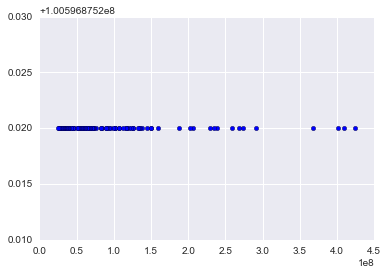

In [7]:
plt.scatter(y, y_pred);

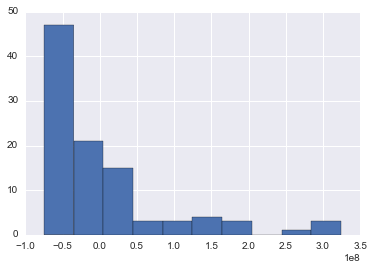

In [8]:
# Generate and plot residuals
resids = y - y_pred
resids.hist();

**Exercise 3.2**

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

**Discussion**  
Here the feature variable is the film's runtime in minutes.  Runtime has a statistically significant positive effect on Domestic Total Gross, which can account for almost 9% of the variation in it. The histogram of residuals is slightly closer to a normal distribution than above, but still has a long right tail. For large values of Domestic Total Gross the predicted value is much too small, and for small values the predictions are somewhat too high.

In [9]:
X1 = X.copy()
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Constant    100 non-null int64
Runtime     100 non-null int64
dtypes: int64(2)
memory usage: 1.6 KB


In [10]:
#Run the model with statsmodels so I can see the regression table
model = sm.OLS(y, X1)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     9.180
Date:                Tue, 11 Oct 2016   Prob (F-statistic):            0.00313
Time:                        18:29:19   Log-Likelihood:                -1965.5
No. Observations:                 100   AIC:                             3935.
Df Residuals:                      98   BIC:                             3940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant   -5.725e+07   5.28e+07     -1.085      0.281     -1.62e+08  4.75e+07
Runtime     1.406e+06   4.64e+05      3.030      0.003      4.85e+05  2.33e+06
==============================================================================
Omnibus:                       50.222   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.001
Skew:                           1.932   Prob(JB):                     7.19e-28
Kurtosis:                       6.883   Cond. No.                         714.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#And with sklearn so I can get predictions
lr = LinearRegression()
lr.fit(X1, y)

# Generate predicted values
y_pred = lr.predict(X1)

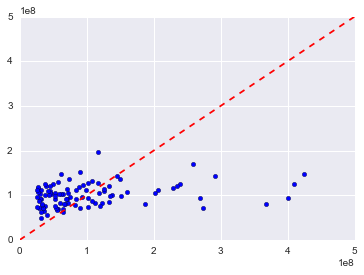

In [12]:
plt.scatter(y, y_pred);
plt.xlim([0,5e8])
plt.ylim([0, 5e8])
plt.plot([0, 5e8], [0, 5e8], 'r--');

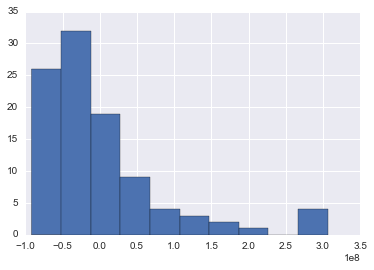

In [13]:
# Generate and plot residuals
resids = y - y_pred
resids.hist();

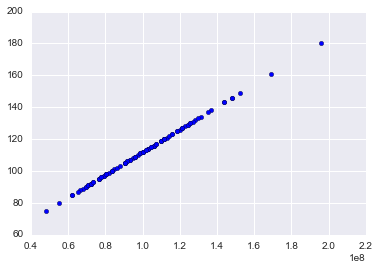

In [14]:
plt.scatter(y_pred, X1.Runtime);

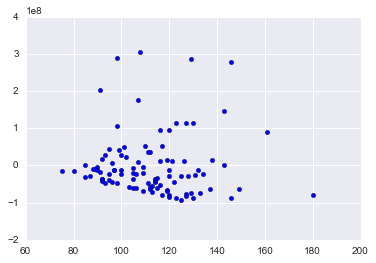

In [15]:
plt.scatter(X1.Runtime, resids);

**Exercise 3.3**

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

**Discussion**  
Here the categorical variable is the Rating, for which there are four categories.  I drop one, R, for the regression.  Accounting for the ratings categories allows the model to account for almost 11% of the variation in Domestic Total Gross.  Each rating G, PG, and PG-13 has a statistically significant positive effect on Domestic Total Gross when compared with the reference category of an R rating.  This model generates four distinct predicted values of Domestic Total Gross, which is obviously much less than the true number of distinct values.  The residuals are again a bit closer to normally distributed when compared with the constant-only model, but there is still no left tail and a long right one. 

In [46]:
#Create a matrix with constant plus categorical variable rating, create dummies, and drop R as a reference category
X2 = chall3movies[['Constant', 'Rating']].copy() 
X2 = pd.get_dummies(X_cat)
X2a = X2.drop('Rating_R', axis = 1)
print X2a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Constant        100 non-null int64
Rating_G        100 non-null float64
Rating_PG       100 non-null float64
Rating_PG-13    100 non-null float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB
None


In [47]:
#Run the model with statsmodels so I can see the regression table
model = sm.OLS(y, X2a)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Tue, 11 Oct 2016   Prob (F-statistic):             0.0109
Time:                        18:38:13   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Constant      6.989e+07   1.38e+07      5.075      0.000      4.26e+07  9.72e+07
Rating_G      1.986e+08   8.49e+07      2.340      0.021      3.01e+07  3.67e+08
Rating_PG     6.124e+07   2.56e+07      2.389      0.019      1.03e+07  1.12e+08
Rating_PG-13  4.156e+07   1.84e+07      2.257      0.026      5.01e+06  7.81e+07
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#And with sklearn so I can get predictions
lr = LinearRegression()
lr.fit(X2a, y)

# Generate predicted values
y_pred = lr.predict(X2a)

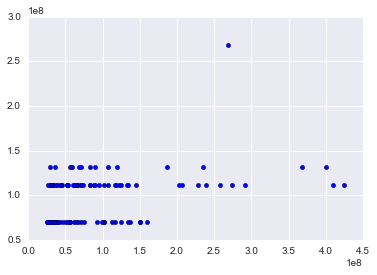

In [49]:
plt.scatter(y, y_pred);

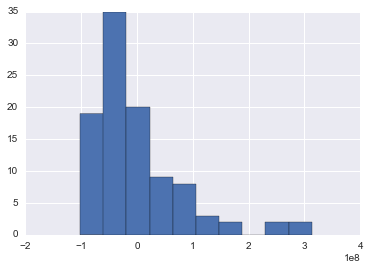

In [50]:
# Generate and plot residuals
resids = y - y_pred
resids.hist();

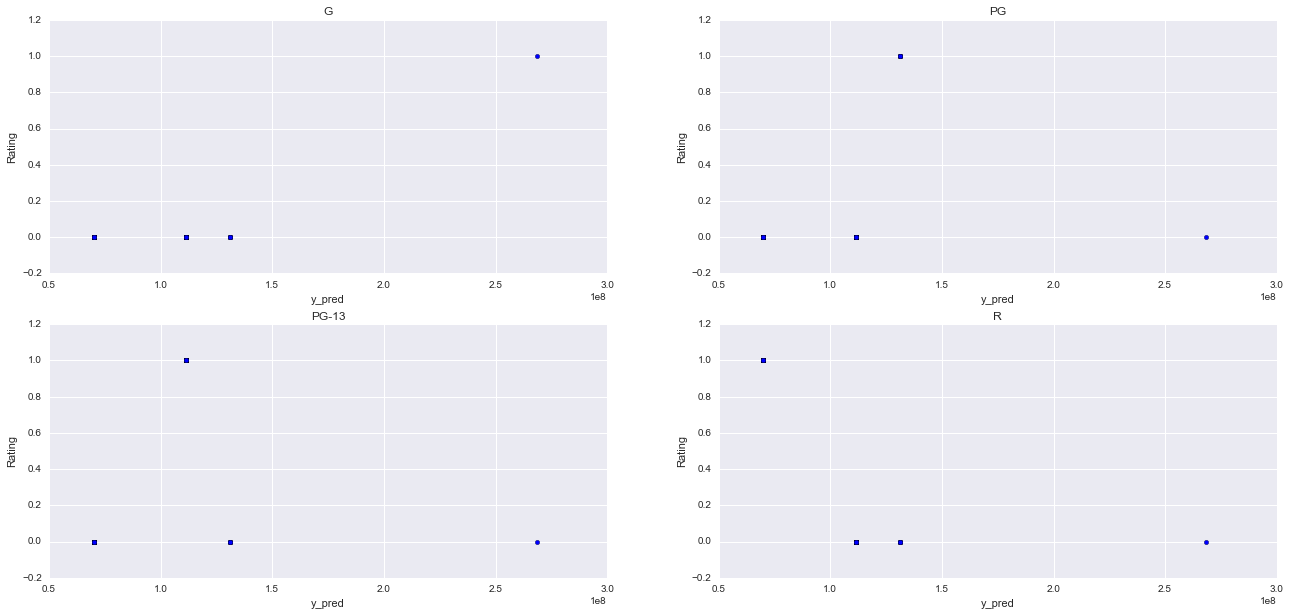

In [51]:
#Plot the predictions against the dummies for each rating level
#These graphs look strange -- they appear to have too few observations -- but are correct.  
#There are multiple observations at each dot since there are only 4 distinct predicted values of y in this model.

plt.figure(figsize=(22, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_pred, X2a.Rating_G)
plt.title('G')
plt.ylabel('Rating')
plt.xlabel('y_pred')

plt.subplot(2, 2, 2)
plt.scatter(y_pred, X2a.Rating_PG)
plt.title('PG')
plt.ylabel('Rating')
plt.xlabel('y_pred')

plt.subplot(2, 2, 3)
plt.scatter(y_pred, X2a['Rating_PG-13'])
plt.title('PG-13')
plt.ylabel('Rating')
plt.xlabel('y_pred')

plt.subplot(2, 2, 4)
plt.scatter(y_pred, X2.Rating_R)
plt.title('R')
plt.ylabel('Rating')
plt.xlabel('y_pred');

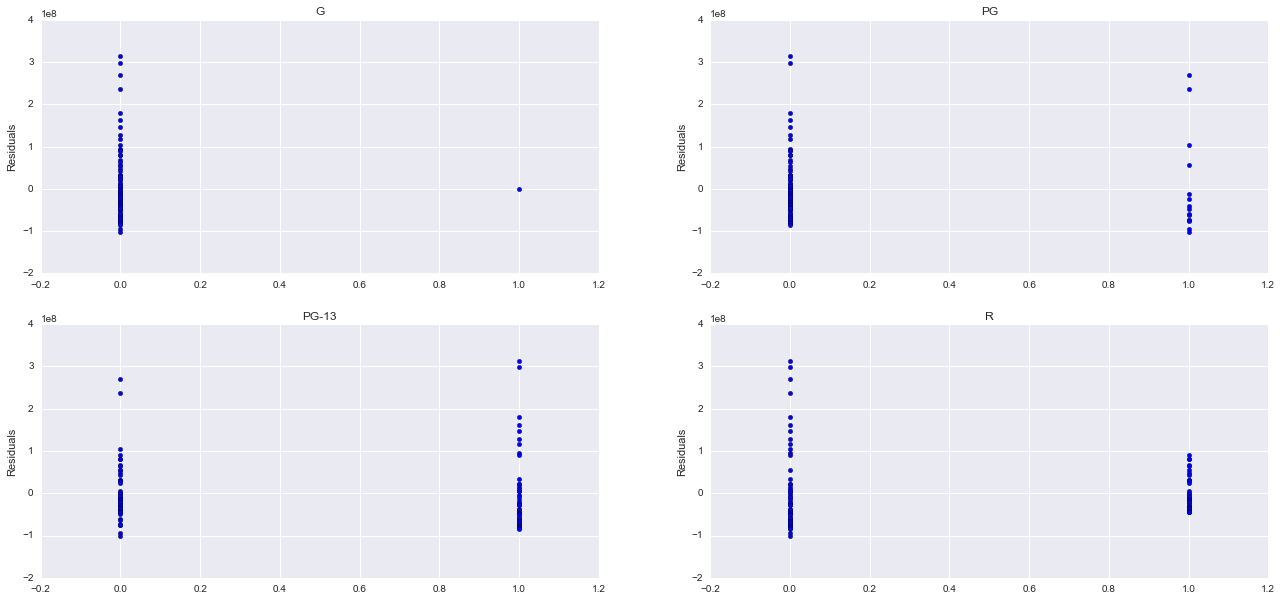

In [52]:
#Plot the predictions against the residuals

plt.figure(figsize=(22, 10))

plt.subplot(2, 2, 1)
plt.scatter(X2a.Rating_G, resids)
plt.title('G')
plt.ylabel('Residuals')

plt.subplot(2, 2, 2)
plt.scatter(X2a.Rating_PG, resids)
plt.title('PG')
plt.ylabel('Residuals')

plt.subplot(2, 2, 3)
plt.scatter(X2a['Rating_PG-13'], resids)
plt.title('PG-13')
plt.ylabel('Residuals')

plt.subplot(2, 2, 4)
plt.scatter(X2.Rating_R, resids)
plt.title('R')
plt.ylabel('Residuals');

**Exercise 3.4**

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

**Discussion**  
Here I've surrendered some data points in order to be able to include budget.  I also generated an indicator variable for whether the movie was released in the summer months (May-August) based on looking at the Seaborn boxplots below.  Overall the model explains more of the variation than the above ones -- about 30% of the variation in Domestic Total Gross. You can see this in the histogram of the residuals, which is significantly closer to a normal distribution than in the above models. Outliers on the high end of Domestic Total Gross are still significantly underpredicted.

In [53]:
#Create feature matrix for this larger model. First include ReleaseDate and then use this to get the month.
X3 = chall3movies[['Constant', 'Runtime', 'Budget', 'Rating', 'ReleaseDate']].copy()
X3['ReleaseMonth'] = pd.DatetimeIndex(X3['ReleaseDate']).month

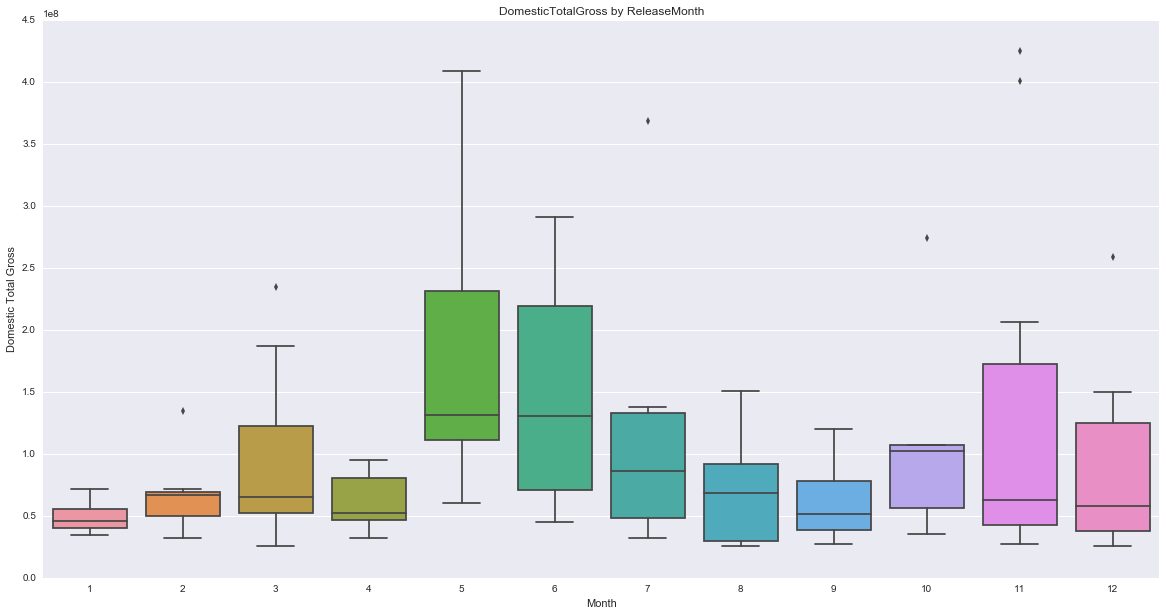

In [54]:
#Use Seaborn boxplots to look at relationship between y and ReleaseMonth 
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('DomesticTotalGross by ReleaseMonth')
sns.boxplot(x=X3['ReleaseMonth'].sort_values(), y=y)
ax.set_xlabel('Month')
ax.set_ylabel('Domestic Total Gross');

In [55]:
#Looks like summer is distinct from the rest of the year
#Create a variable to capture movies released in the summer months: May-August

def get_summer(cell):
    if cell in range(5, 9):
        return 1
    else:
        return 0
        
X3['SummerRelease'] = map(get_summer, X3['ReleaseMonth'])

In [56]:
X3 = X3.drop(['ReleaseDate', 'ReleaseMonth'], axis = 1)
X3 = X3.dropna(how='any')
X3 = pd.get_dummies(X3)

#Now drop final column so we only include PG and PG-13 and leave R as the reference category
#(No G movies in this set with the budget)
X3 = X3.drop('Rating_R', axis = 1)
y2 = y[X3.index]
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 6 columns):
Constant         89 non-null int64
Runtime          89 non-null int64
Budget           89 non-null float64
SummerRelease    89 non-null int64
Rating_PG        89 non-null float64
Rating_PG-13     89 non-null float64
dtypes: float64(3), int64(3)
memory usage: 4.9 KB


In [57]:
#Run the model with statsmodels so I can see the regression table
model = sm.OLS(y2, X3)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     7.191
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           1.23e-05
Time:                        18:39:51   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3486.
Df Residuals:                      83   BIC:                             3501.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Constant      -2.222e+07   5.82e+07     -0.382      0.704     -1.38e+08  9.36e+07
Runtime         6.13e+05   5.25e+05      1.168      0.246     -4.31e+05  1.66e+06
Budget            0.6963      0.173      4.017      0.000         0.352     1.041
SummerRelease  2.537e+06   1.72e+07      0.148      0.883     -3.16e+07  3.67e+07
Rating_PG      2.551e+07   2.68e+07      0.953      0.343     -2.77e+07  7.87e+07
Rating_PG-13  -2.283e+06   1.96e+07     -0.116      0.908     -4.14e+07  3.68e+07
==============================================================================
Omnibus:                       37.072   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.203
Skew:                           1.531   Prob(JB):                     8.56e-19
Kurtosis:                       6.615   Cond. No.                     7.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#And with sklearn so I can get predictions
lr = LinearRegression()
lr.fit(X3, y2)

# Generate predicted values
y2_pred = lr.predict(X3)

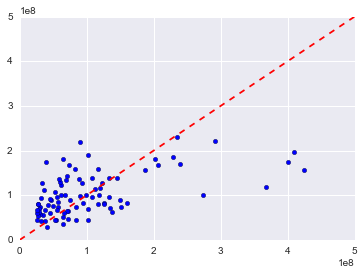

In [59]:
plt.scatter(y2, y2_pred)
plt.xlim([0,5e8])
plt.ylim([0, 5e8])
plt.plot([0, 5e8], [0, 5e8], 'r--');

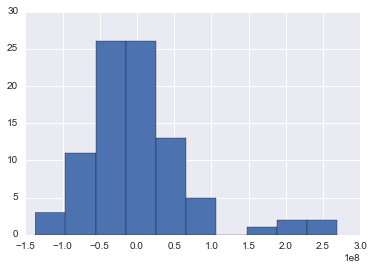

In [60]:
# Generate and plot residuals
resids = y2 - y2_pred
resids.hist();

**Exercise 3.5**

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [61]:
X3_train, X3_test, y2_train, y2_test = train_test_split(X3, y2, test_size=0.25, random_state=42)

#Run with sklearn:
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X3_train, y2_train)

# Test it on the test set
y2_pred = lr.predict(X3_test)

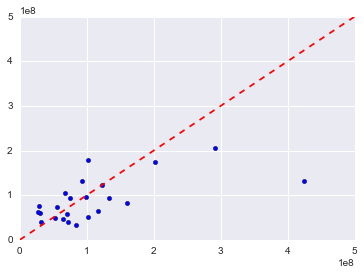

In [62]:
plt.scatter(y2_test, y2_pred)
plt.xlim([0,5e8])
plt.ylim([0, 5e8])
plt.plot([0, 5e8], [0, 5e8], 'r--');